In [1]:
import yt
import unyt
# import yt_idv
import matplotlib.pyplot as plt
import numpy as np
import pprint

# from numba import njit

# Load particle information in snapshot with yt

In [3]:
snap_dict = {
    r'Manhattan Suite (L0) - Halo 0':{
        'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_272.hdf5',
    },
    # r'Manhattan Suite (L1) - Halo 0':{
    #     'snap_file':'/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_8x/halo00000/snapshot_272.hdf5',
    # },
}

In [4]:
for snap_name, items in snap_dict.items():
    print(snap_name)
    items['snap'] = yt.load(items['snap_file'])
    items['snap_info'] = {}
    items['properties'] = {}

Manhattan Suite (L0) - Halo 0


yt : [INFO     ] 2025-11-09 20:37:28,675 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-11-09 20:37:28,690 Calculating time from 3.300e-01 to be 1.023e+17 seconds
yt : [INFO     ] 2025-11-09 20:37:28,691 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-11-09 20:37:28,794 Parameters: current_time              = 1.0227818617886229e+17 s
yt : [INFO     ] 2025-11-09 20:37:28,794 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-11-09 20:37:28,795 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-11-09 20:37:28,796 Parameters: domain_right_edge         = [1000000. 1000000. 1000000.]
yt : [INFO     ] 2025-11-09 20:37:28,797 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-11-09 20:37:28,797 Parameters: current_redshift          = 2.030303030303029
yt : [INFO     ] 2025-11-09 20:37:28,798 Parameters: omega_lambda              = 0.692
yt : [INFO     ] 2025-11-09 20:37:28,799

## Information

In [5]:
for snap_name, items in snap_dict.items():
    print(snap_name)
    items['snap_info']['z'] = items['snap'].current_redshift
    items['snap_info']['vars'] = vars(items['snap'])
    items['snap_info']['field_list'] = items['snap'].field_list
    items['snap_info']['derived_field_list'] = items['snap'].derived_field_list
    items['snap_info']['domain_width'] = items['snap'].domain_width.in_units('Mpc/h')
    items['snap_info']['particle_types'] = items['snap'].particle_types
    items['snap_info']['particle_type_counts'] = items['snap'].particle_type_counts

Manhattan Suite (L0) - Halo 0


yt : [INFO     ] 2025-11-09 20:37:33,065 Allocating for 8.386e+07 particles
Loading particle index: 100%|██████████| 126/126 [00:00<00:00, 4490.88it/s]


In [6]:
snap_dict

{'Manhattan Suite (L0) - Halo 0': {'snap_file': '/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_272.hdf5',
  'snap': GizmoDataset: /scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_272.hdf5,
  'snap_info': {'z': np.float64(2.030303030303029),
   'vars': {'storage_filename': None,
    '_header': <yt.frontends.gadget.data_structures.GadgetBinaryHeader at 0x1511fe7e2710>,
    '_field_spec': ('Coordinates',
     'Velocities',
     'ParticleIDs',
     'Mass',
     ('InternalEnergy', 'Gas'),
     ('Density', 'Gas'),
     ('SmoothingLength', 'Gas')),
    '_ptype_spec': ('Gas', 'Halo', 'Disk', 'Bulge', 'Stars', 'Bndry'),
    '_id_dtype': 'u4',
    'long_ids': False,
    'header_offset': 0,
    '_unit_base': {'length': (1.0, 'kpccm/h')},
    'use_dark_factor': False,
    'w_0': -1.0,
    'w_a': 0.0,
    'kernel_name': 'cubic',
    'kdtree_filename': None,
    'index_order': (6, 4),
    'index_filename': Non

In [7]:
snap_dict['Manhattan Suite (L0) - Halo 0']['snap_info']['vars']['parameters']['NumPart_Total']

array([31991342, 32772289, 18336994,        0,   755227,     1772],
      dtype=uint32)

In [8]:
snap_dict['Manhattan Suite (L1) - Halo 0']['snap_info']['vars']['parameters']['NumPart_Total']

array([251653340, 260255489,  22382280,         0,   8424535,      3753],
      dtype=uint32)

In [9]:
snap_dict['Manhattan Suite (L0) - Halo 0']['snap_info']['vars']['refine_by']

2

In [10]:
snap_dict['Manhattan Suite (L1) - Halo 0']['snap_info']['vars']['refine_by']

2

# Get particle properties of interest

In [7]:
properties = {
    # 'all_x_position':{
    #     'name':['all', 'particle_position_x'],
    #     'units':'kpc',
    #     'printable_name':r'$x$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'gas_mass':{
    #     'name':['gas', 'mass'],
    #     'units':'Msun',
    #     'printable_name':'Gas Mass',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_smoothinglength_nolog':{
    #     'name':['gas', 'smoothing_length'],
    #     'units':'kpc',
    #     'printable_name':'Gas Smoothing Length',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'gas_smoothinglength_log':{
    #     'name':['gas', 'smoothing_length'],
    #     'units':'kpc',
    #     'printable_name':'Gas Smoothing Length',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_baryonoverdensity':{
    #     'name':['gas', 'baryon_overdensity'],
    #     'units':'1',
    #     'printable_name':'Baryon Overdensity',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_temp':{
    #     'name':['gas', 'temperature'],
    #     'units':'K',
    #     'printable_name':r'$T_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_u':{
    #     'name':['PartType0', 'InternalEnergy'],
    #     'units':'km**2/s**2', #'keV/Msun',
    #     'printable_name':r'$u_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_velocity':{
    #     'name':['gas', 'velocity_magnitude'],
    #     'units':'km/s',
    #     'printable_name':r'$|v_{\mathrm{gas}}|$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_kedensity':{
    #     'name':['gas', 'kinetic_energy_density'],
    #     'units':'keV/cm**3',
    #     'printable_name':r'$KE\,\,\mathrm{density}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_density':{
    #     'name':['gas', 'density'],
    #     'units':'g/cm**3',
    #     'printable_name':r'$\rho_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_electronabundance_nolog':{
    #     'name':['PartType0', 'ElectronAbundance'],
    #     'units':'1',
    #     'printable_name':r'$f_e$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'gas_electronabundance_log':{
    #     'name':['PartType0', 'ElectronAbundance'],
    #     'units':'1',
    #     'printable_name':r'$f_e$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_entropy':{
    #     'name':['gas', 'entropy'],
    #     'units':'cm**2*keV',
    #     'printable_name':r'$K_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_dynamicaltime_nolog':{
    #     'name':['gas', 'dynamical_time'],
    #     'units':'Gyr',
    #     'printable_name':r'$t_{\mathrm{dyn}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'gas_dynamicaltime_log':{
    #     'name':['gas', 'dynamical_time'],
    #     'units':'Gyr',
    #     'printable_name':r'$t_{\mathrm{dyn}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_nwindlaunches_nolog':{
    #     'name':['PartType0', 'NWindLaunches'],
    #     'units':'1',
    #     'printable_name':r'$N_{\mathrm{wind\,launches}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'gas_nwindlaunches_log':{
    #     'name':['PartType0', 'NWindLaunches'],
    #     'units':'1',
    #     'printable_name':r'$N_{\mathrm{wind\,launches}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_delaytime_nolog':{
    #     'name':['PartType0', 'DelayTime'],
    #     'units':'1',
    #     'printable_name':'Delay Time',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'gas_delaytime_log':{
    #     'name':['PartType0', 'DelayTime'],
    #     'units':'1',
    #     'printable_name':'Delay Time',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_metallicity_nolog':{
    #     'name':['gas', 'metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'gas_metallicity_log':{
    #     'name':['gas', 'metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'gas_fe_metallicity_nolog':{
    #     'name':['gas', 'Fe_metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{Fe,gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'gas_fe_metallicity_log':{
    #     'name':['gas', 'Fe_metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{Fe,gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    'gas_sfr':{
        'name':['gas', 'star_formation_rate'],
        'units':'Msun/yr',
        'printable_name':r'$\mathrm{SFR_{gas}}$',
        'remove_infs':True,
        'remove_zeros':False,
        'log':True,
    },
    # 'star_metallicity_nolog':{
    #     'name':['PartType4', 'metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{star}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'star_metallicity_log':{
    #     'name':['PartType4', 'metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{star}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'star_fe_metallicity_nolog':{
    #     'name':['PartType4', 'Fe_metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{Fe,star}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'star_fe_metallicity_log':{
    #     'name':['PartType4', 'Fe_metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{Fe,star}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    'star_formation_time':{
        'name':['PartType4', 'StellarFormationTime'],
        'units':'',
        'printable_name':r'Stellar Formation Time',
        'remove_infs':True,
        'remove_zeros':False,
        'log':False,
    },
    'star_age':{
        'name':['PartType4', 'age'],
        'units':'Gyr',
        'printable_name':r'Stellar Age',
        'remove_infs':True,
        'remove_zeros':False,
        'log':True,
    },
    'star_creation_time':{
        'name':['PartType4', 'creation_time'],
        'units':'Gyr',
        'printable_name':r'Stellar Creation Time',
        'remove_infs':True,
        'remove_zeros':False,
        'log':True,
    },
    # 'parttype1_mass':{
    #     'name':['PartType1', 'Masses'],
    #     'units':'Msun/h',
    #     'printable_name':r'$M_{\mathrm{PartType1}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'parttype2_mass':{
    #     'name':['PartType2', 'Masses'],
    #     'units':'Msun/h',
    #     'printable_name':r'$M_{\mathrm{PartType2}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'parttype1_velocity':{
    #     'name':['PartType1', 'particle_velocity_magnitude'],
    #     'units':'km/s',
    #     'printable_name':r'$|v_{\mathrm{PartType1}}|$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'parttype2_velocity':{
    #     'name':['PartType2', 'particle_velocity_magnitude'],
    #     'units':'km/s',
    #     'printable_name':r'$|v_{\mathrm{PartType2}}|$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'bh_dynamical_mass':{
    #     'name':['PartType5', 'Masses'],
    #     'units':'Msun/h',
    #     'printable_name':r'$M_{\mathrm{BH,dyn}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'bh_physical_mass':{
    #     'name':['PartType5', 'BH_Mass'],
    #     'units':'Msun/h',
    #     'printable_name':r'$M_{\mathrm{BH,phys}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'bh_mdot':{
    #     'name':['PartType5', 'BH_Mdot'],
    #     'units':'Msun/yr',
    #     'printable_name':r'$\dot{M}_{\mathrm{BH}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'bh_agssoftening_nolog':{
    #     'name':['PartType5', 'AGS-Softening'],
    #     'units':'1',
    #     'printable_name':'AGS Softening',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'bh_agssoftening_log':{
    #     'name':['PartType5', 'AGS-Softening'],
    #     'units':'1',
    #     'printable_name':'AGS Softening',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'bh_accretionlength':{
    #     'name':['PartType5', 'BH_AccretionLength'],
    #     'units':'1',
    #     'printable_name':'BH Accretion length',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'bh_massalphadisk':{
    #     'name':['PartType5', 'BH_Mass_AlphaDisk'],
    #     'units':'Msun',
    #     'printable_name':'BH Mass Alpha disk',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'bh_nprogs_nolog':{
    #     'name':['PartType5', 'BH_NProgs'],
    #     'units':'1',
    #     'printable_name':'BH N Progs',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'bh_nprogs_log':{
    #     'name':['PartType5', 'BH_NProgs'],
    #     'units':'1',
    #     'printable_name':'BH N Progs',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
    # 'bh_contaminationcount_nolog':{
    #     'name':['PartType5', 'ContaminationCount'],
    #     'units':'1',
    #     'printable_name':'BH Contamination Count',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'bh_contaminationcount_log':{
    #     'name':['PartType5', 'ContaminationCount'],
    #     'units':'1',
    #     'printable_name':'BH Contamination Count',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':True,
    # },
}

ndex_below_min = 3

In [8]:
for snap_name, items in snap_dict.items():
    print(snap_name)
    all_data = items['snap'].all_data()
    for prop, prop_info in properties.items():
        print(f'{prop} {prop_info['units']}')
        items['properties'][prop] = all_data[*prop_info['name']].in_units(prop_info['units'])
        # if prop_info['log']:
            # values_to_plot = np.log10(values_to_plot)
            # items['properties'][prop] = np.log10(items['properties'][prop])
        if prop_info['remove_infs']:
            items['properties'][prop][items['properties'][prop]==np.inf] = np.nan
        if prop_info['remove_zeros']:
            nzeros = np.count_nonzero(items['properties'][prop]==0)
            items['properties'][prop][items['properties'][prop]==0] = np.nan
            # if prop_info['log']:
            #     zero_vals = [10**(np.log10(np.min(items['properties'][prop][np.isfinite(items['properties'][prop])]))-ndex_below_min)]*nzeros
            #     zero_vals = unyt.unyt_array(zero_vals, items['properties'][prop].units)
            #     items['properties'][prop] = np.append(items['properties'][prop], zero_vals)
        if prop_info['log']:
            nzeros = np.count_nonzero(items['properties'][prop]==0)
            items['properties'][prop][items['properties'][prop]==0] = np.nan
            zero_vals = [10**(np.log10(np.min(items['properties'][prop][np.isfinite(items['properties'][prop])]))-ndex_below_min)]*nzeros
            zero_vals = unyt.unyt_array(zero_vals, items['properties'][prop].units)
            items['properties'][prop] = np.append(items['properties'][prop], zero_vals)
    print()

Manhattan Suite (L0) - Halo 0
gas_sfr Msun/yr
star_formation_time 
star_age Gyr


/scratch/aspadawe/igrm-turbulent-diffusion/pyenvs/main/lib/python3.13/site-packages/unyt/array.py:1832: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


star_creation_time Gyr



In [ ]:
# @njit
# def get_property_values(snap_dict, properties):
#     for snap_name, items in snap_dict.items():
#         print(snap_name)
#         all_data = items['snap'].all_data()
#         for prop, prop_info in properties.items():
#             print(f'{prop} {prop_info['units']}')
#             items['properties'][prop] = all_data[*prop_info['name']].in_units(prop_info['units'])
#             # if prop_info['log']:
#                 # values_to_plot = np.log10(values_to_plot)
#                 # items['properties'][prop] = np.log10(items['properties'][prop])
#             if prop_info['remove_infs']:
#                 items['properties'][prop][items['properties'][prop]==np.inf] = np.nan
#             if prop_info['remove_zeros']:
#                 nzeros = np.count_nonzero(items['properties'][prop]==0)
#                 items['properties'][prop][items['properties'][prop]==0] = np.nan
#                 if prop_info['log']:
#                     zero_vals = [10**(np.log10(np.min(items['properties'][prop][np.isfinite(items['properties'][prop])]))-ndex_below_min)]*nzeros
#                     zero_vals = unyt.unyt_array(zero_vals, items['properties'][prop].units)
#                     items['properties'][prop] = np.append(items['properties'][prop], zero_vals)
#         print()

In [ ]:
# get_property_values(snap_dict, properties)

In [ ]:
pprint.pprint(snap_dict)

In [ ]:
# np.where(snap_dict['Hyenas L0 Halo 3224 (OG)']['properties']['gas_metallicity_log']==0)

# Plot properties

## 1D Histograms

gas_sfr


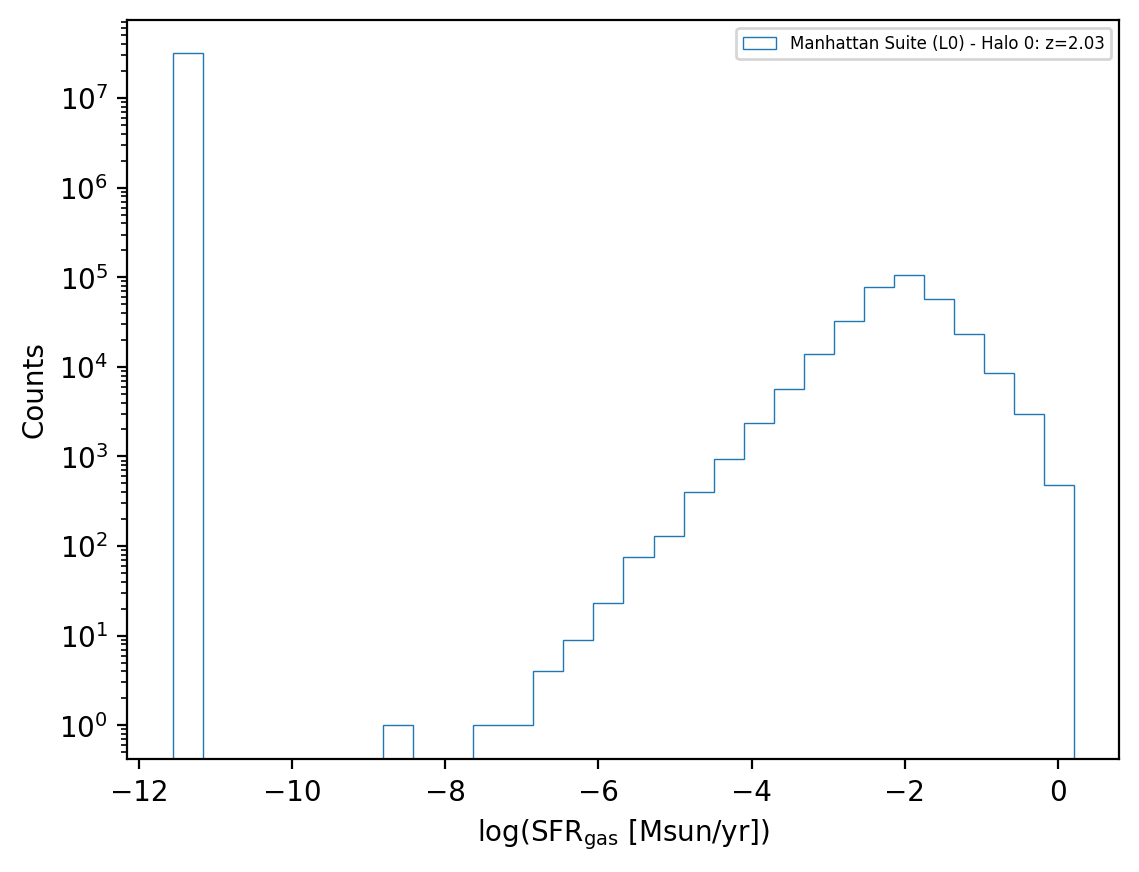

star_formation_time


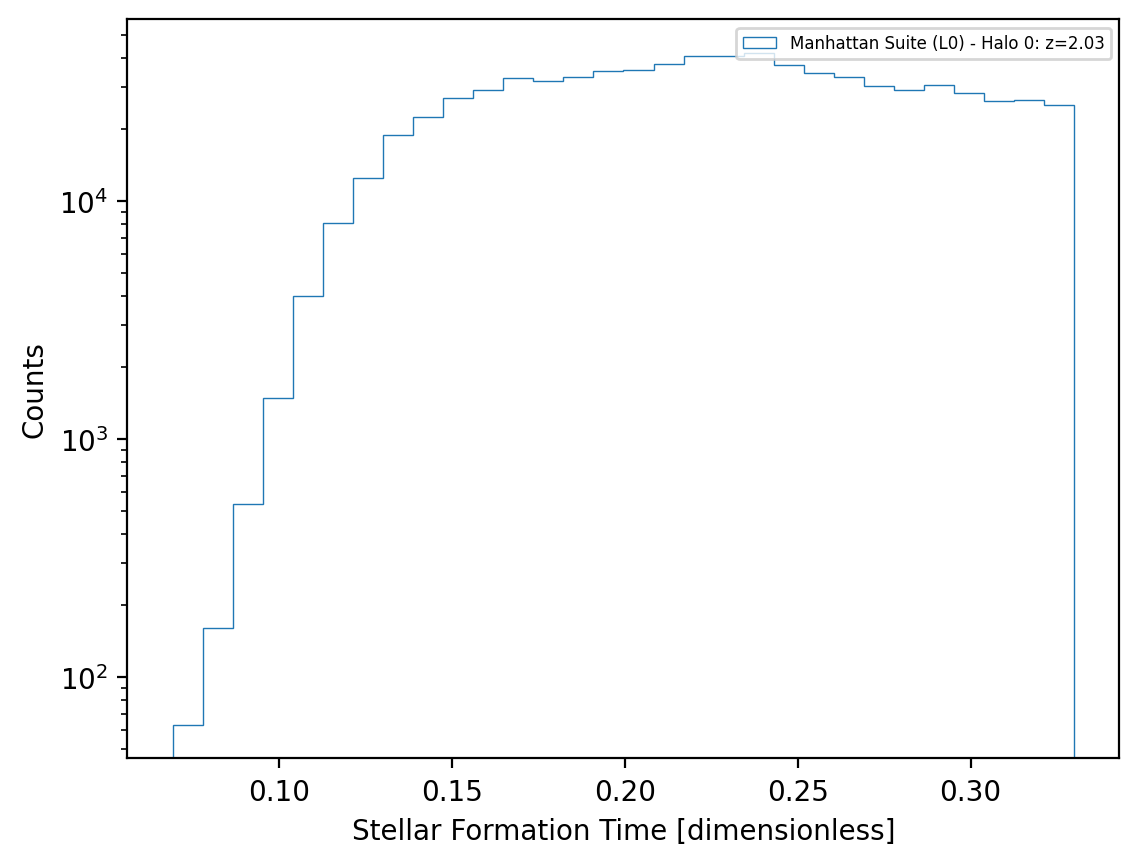

star_age


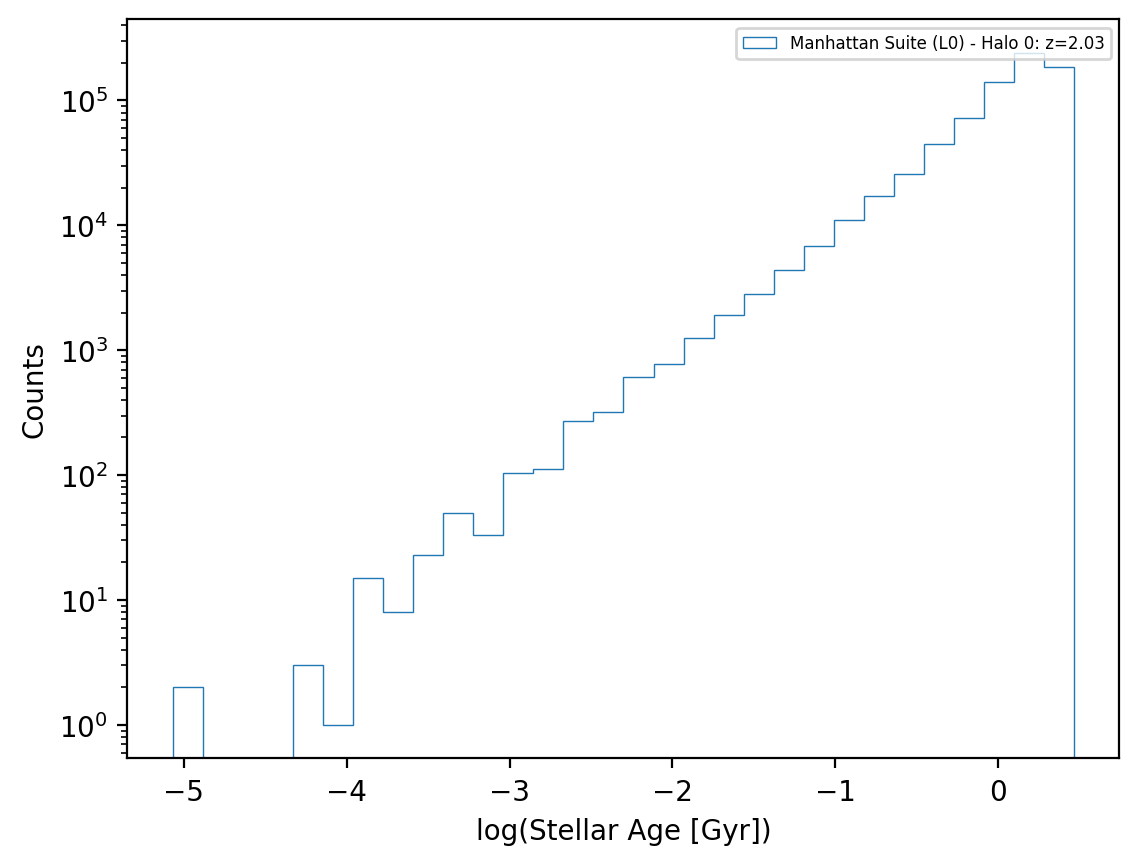

star_creation_time


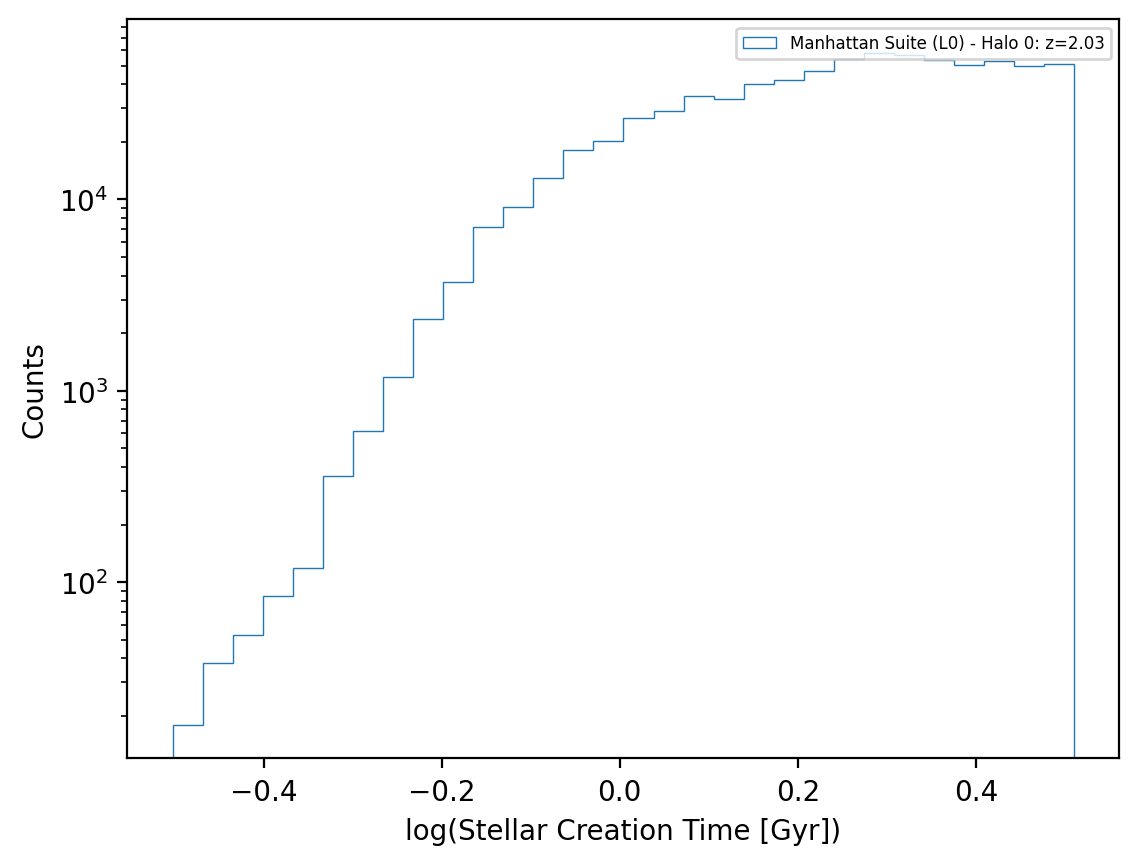

In [9]:
for prop, prop_info in properties.items():
    print(prop)
    lw = len(snap_dict.keys())*0.5
    for snap_name, items in snap_dict.items():
        values = items['properties'][prop]
        values_to_plot = values
        if prop_info['log']:
            values_to_plot = np.log10(values_to_plot)
        plt.hist(values_to_plot, bins=30, log=True, histtype='step', ls='--', linewidth=lw,
                 label=f'{snap_name}: z={items['snap_info']['z']:.2f}')
        lw -= 1*0.5
    xlabel = rf'{prop_info['printable_name']} [{values.units}]'
    if prop_info['log']:
        xlabel = f'log({xlabel})'
    plt.xlabel(xlabel)
    plt.ylabel('Counts')
    plt.legend(fontsize=6, loc='upper right')

    fig = plt.gcf()
    fig.set_dpi(200)
    
    plt.show()

## 2D Histograms

In [32]:
for i in range(10, -1, -1): print(i)

10
9
8
7
6
5
4
3
2
1
0


/tmp/ipykernel_707173/167651060.py:29: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(fontsize=6, loc='upper right')
/tmp/ipykernel_707173/167651060.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=6, loc='upper right')


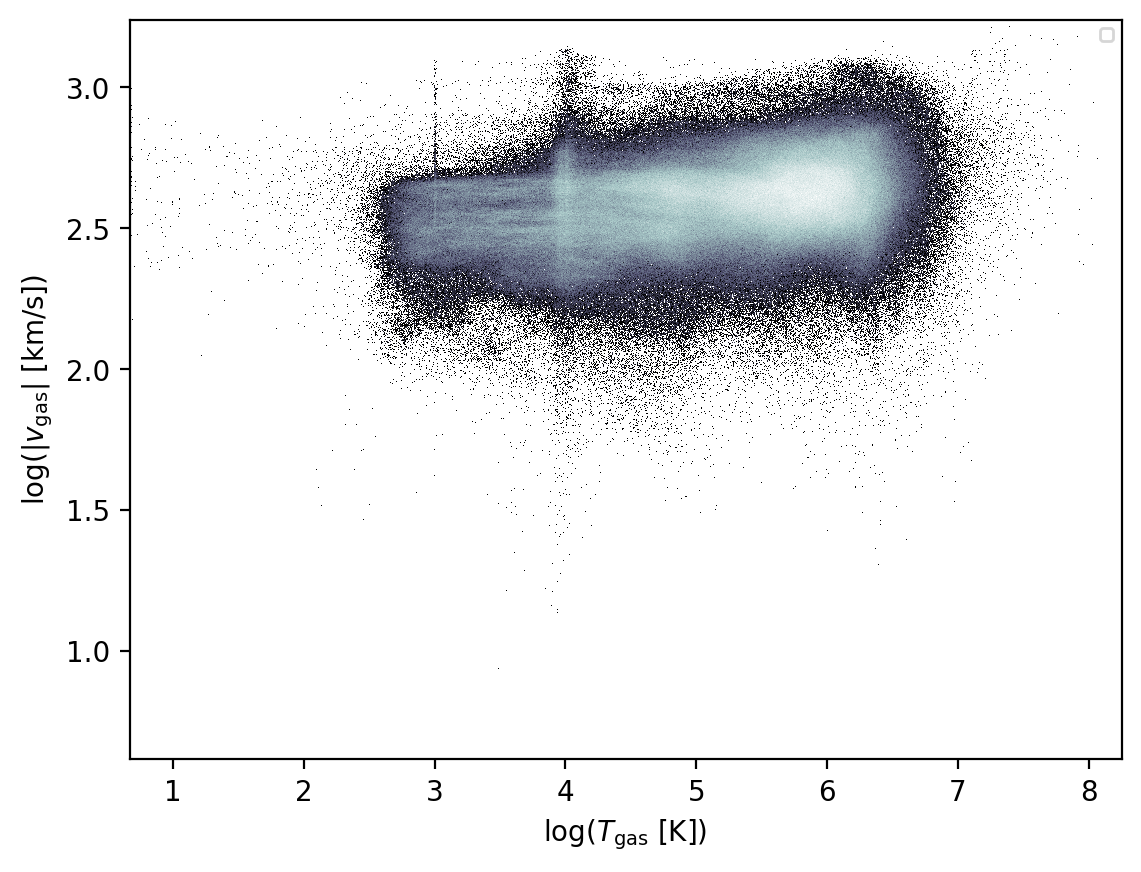

In [20]:
colors = ['C0', 'C1', 'C4', 'C6']
cmaps = ['bone', 'viridis',]
# alphas = [

for snap_i, (snap_name, items) in enumerate(snap_dict.items()):
    temps = items['properties']['gas_temp']
    velocities = items['properties']['gas_velocity']
    
    temps_to_plot = temps
    velocities_to_plot = velocities
    
    temps_to_plot = np.log10(temps_to_plot)
    velocities_to_plot = np.log10(velocities_to_plot)

    plt.hist2d(temps_to_plot, velocities_to_plot,
               bins=1000, cmap=cmaps[snap_i], norm='log',
               label=f'{snap_name}: z={items['snap_info']['z']:.2f}')
    # plt.plot(temps_to_plot, velocities_to_plot, ls='', marker='.',
    #          ms=1, mfc=colors[snap_i], mec='none', alpha=0.5,
    #          label=f'{snap_name}: z={items['snap_info']['z']:.2f}')

xlabel = rf'{properties['gas_temp']['printable_name']} [{temps.units}]'
xlabel = f'log({xlabel})'

ylabel = rf'{properties['gas_velocity']['printable_name']} [{velocities.units}]'
ylabel = f'log({ylabel})'

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(fontsize=6, loc='upper right')
# plt.colorbar(label='Count')

fig = plt.gcf()
fig.set_dpi(200)

plt.show()

/tmp/ipykernel_707173/1602551385.py:30: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(fontsize=6, loc='upper right')
/tmp/ipykernel_707173/1602551385.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=6, loc='upper right')


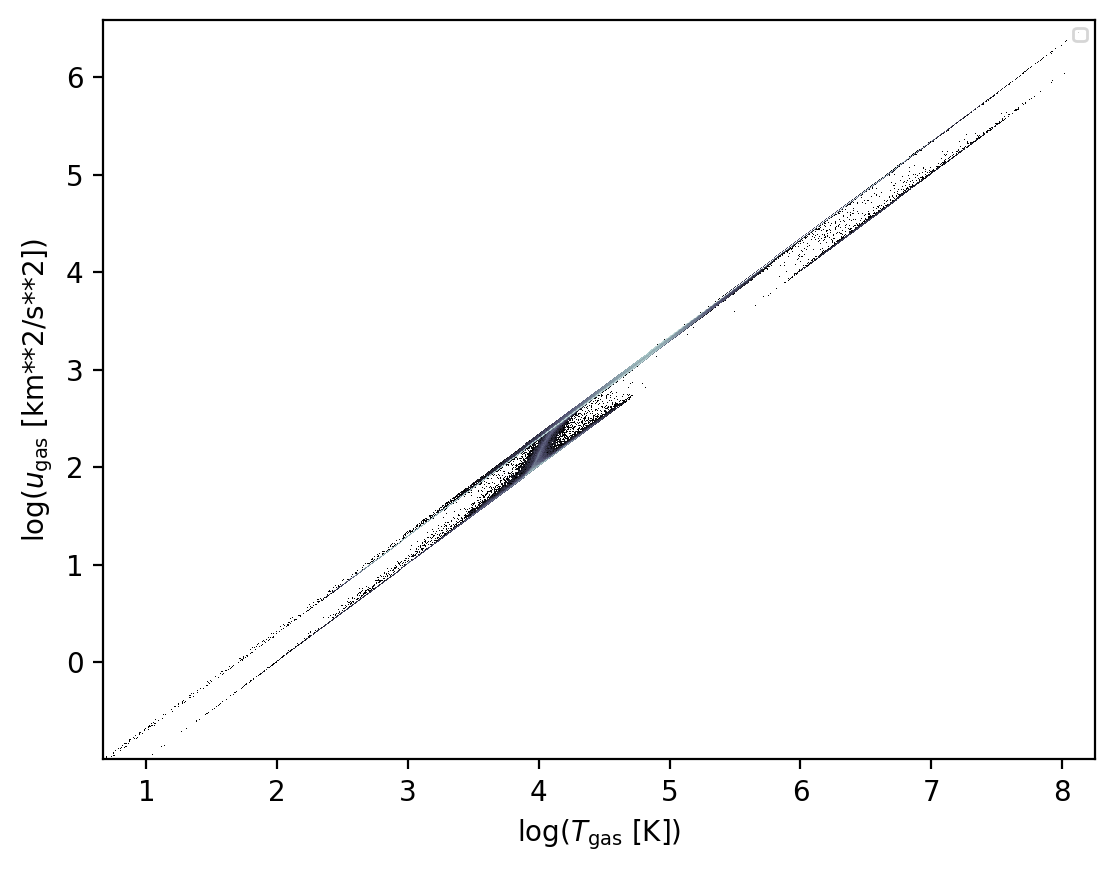

In [27]:
colors = ['C0', 'C1', 'C4', 'C6']
cmaps = ['bone', 'viridis',]
# alphas = [

for snap_i, (snap_name, items) in enumerate(snap_dict.items()):
    x = items['properties']['gas_temp']
    y = items['properties']['gas_u']
    
    x_to_plot = x
    y_to_plot = y
    
    x_to_plot = np.log10(x_to_plot)
    y_to_plot = np.log10(y_to_plot)

    plt.hist2d(x_to_plot, y_to_plot,
               bins=1000, cmap=cmaps[snap_i], norm='log',
               label=f'{snap_name}: z={items['snap_info']['z']:.2f}')
    # plt.plot(temps_to_plot, velocities_to_plot, ls='', marker='.',
    #          ms=1, mfc=colors[snap_i], mec='none', alpha=0.5,
    #          label=f'{snap_name}: z={items['snap_info']['z']:.2f}')

xlabel = rf'{properties['gas_temp']['printable_name']} [{x.units}]'
xlabel = f'log({xlabel})'

ylabel = rf'{properties['gas_u']['printable_name']} [{y.units}]'
ylabel = f'log({ylabel})'

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(fontsize=6, loc='upper right')
# plt.colorbar(label='Count')

fig = plt.gcf()
fig.set_dpi(200)

plt.show()